<a href="https://colab.research.google.com/github/jumbokh/csu1112-class/blob/main/class/TPC_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 安裝 Python 和 SciPy 平台。
* 加載數據集。
* 總結數據集。
* 可視化數據集。
* 評估一些算法。
* 做出一些預測。
## [你的第一個 Python 機器學習項目分步指南](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/?fbclid=IwAR1WSpv2o1CDmp6ZwVLB8NetIJCs23EjL84wgALi12xiWBEQ_VXk6ESUYOc)
### 1.1 安裝 SciPy 庫
* scipy
* numpy
* matplotlib
* pandas
* sklearn
##
### 1.2 啟動Python並檢查版本

In [ ]:
# Check the versions of libraries
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.19.5
matplotlib: 3.2.2
pandas: 1.1.5
sklearn: 0.22.2.post1


## 2. Load The Data
### 2.1 Import libraries

In [ ]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### 2.2 Load Dataset

In [ ]:
# Load dataset
dataset = read_csv('vTestData102.csv')

### 3. Summarize the Dataset
#### 3.1 Dimensions of Dataset

In [ ]:
# shape
print(dataset.shape)

(195, 16)


#### 3.2 Peek at the Data

In [ ]:
# head
print(dataset.head(20))

   CustomID  A  B  C  D  A1  A2  A3  A4  B1  B2  B3  B4  C1  D1  D2
0    C00001  1  1  1  1   0   0   0   0   0   0   0   0   0   0   0
1    C00002  1  1  1  1   0   0   0   0   0   0   0   0   0   0   0
2    C00003  1  1  1  1   0   0   0   0   0   0   0   0   0   0   0
3    C00004  1  1  1  1   0   0   0   0   0   0   0   0   0   0   0
4    C00005  1  1  1  1   0   0   0   0   0   0   0   0   0   0   0
5    C00006  1  1  1  1   0   0   0   0   0   0   0   0   0   0   0
6    C00007  1  1  1  1   0   0   0   0   0   0   0   0   0   0   0
7    C00008  1  1  1  1   0   0   0   0   0   0   0   0   0   0   0
8    C00009  1  1  1  1   0   0   0   0   0   0   0   0   0   0   0
9    C00010  1  1  1  1   0   0   0   0   0   0   0   0   0   0   0
10   C00011  1  1  1  1   0   0   0   0   0   0   0   0   0   0   0
11   C00012  1  1  1  1   0   0   0   0   0   0   0   0   0   0   0
12   C00013  1  1  1  1   0   0   0   0   0   0   0   0   0   0   0
13   C00014  1  1  1  1   0   0   0   0   0   0 

#### 3.3 Statistical Summary

#### 每個屬性的摘要。

#### 這包括計數、平均值、最小值和最大值以及一些百分位數。

In [ ]:
# descriptions
print(dataset.describe())

                A           B           C  ...          C1          D1          D2
count  195.000000  195.000000  195.000000  ...  195.000000  195.000000  195.000000
mean     0.969231    0.974359    0.974359  ...    0.025641    0.025641    0.020513
std      0.173136    0.158469    0.158469  ...    0.158469    0.158469    0.142111
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      1.000000    1.000000    1.000000  ...    0.000000    0.000000    0.000000
50%      1.000000    1.000000    1.000000  ...    0.000000    0.000000    0.000000
75%      1.000000    1.000000    1.000000  ...    0.000000    0.000000    0.000000
max      1.000000    1.000000    1.000000  ...    1.000000    1.000000    1.000000

[8 rows x 15 columns]


#### 3.4 Class Distribution

#### 看看屬於每個類的實例（列）數。我們可以將其視為絕對計數。

*　每個類都有相同數量的實例（數據集的 50 或 33%）

In [ ]:
# class distribution
#print(dataset.groupby('class').size())
dataset.groupby(['A','B','C','D']).size()

A  B  C  D
0  0  0  0      5
   1  1  1      1
1  1  1  1    189
dtype: int64

In [ ]:
gb = dataset.groupby(['A','B','C','D'])   
ds = [gb.get_group(x) for x in gb.groups]

In [ ]:
import pandas as pd
s = pd.DataFrame(ds[0])
s1 = pd.DataFrame(ds[1])
s2 = pd.DataFrame(ds[2])
print(s)
print('=======================================================================')
print(s1)
print('=======================================================================')
print(s2)

    CustomID  A  B  C  D  A1  A2  A3  A4  B1  B2  B3  B4  C1  D1  D2
39    C00040  0  0  0  0   0   0   1   0   0   1   0   1   1   1   0
140   C00141  0  0  0  0   0   0   0   1   1   1   1   1   1   1   1
178   C00179  0  0  0  0   0   0   1   0   1   0   1   0   1   1   1
179   C00180  0  0  0  0   0   1   1   0   1   0   1   0   1   1   1
180   C00181  0  0  0  0   0   0   1   0   1   0   1   0   1   1   1
CustomID    5
A           5
B           5
C           5
D           5
A1          5
A2          5
A3          5
A4          5
B1          5
B2          5
B3          5
B4          5
C1          5
D1          5
D2          5
dtype: int64
   CustomID  A  B  C  D  A1  A2  A3  A4  B1  B2  B3  B4  C1  D1  D2
58   C00059  0  1  1  1   0   1   0   0   0   0   0   0   0   0   0
CustomID    1
A           1
B           1
C           1
D           1
A1          1
A2          1
A3          1
A4          1
B1          1
B2          1
B3          1
B4          1
C1          1
D1          1
D2 

0    5
Name: A1, dtype: int64


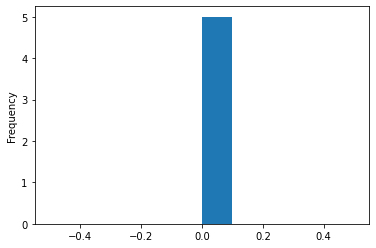

************************************************************
0    4
1    1
Name: A2, dtype: int64


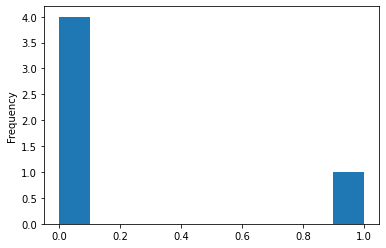

************************************************************
1    4
0    1
Name: A3, dtype: int64


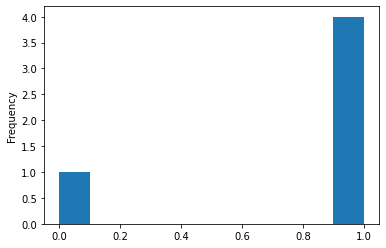

************************************************************
0    4
1    1
Name: A4, dtype: int64


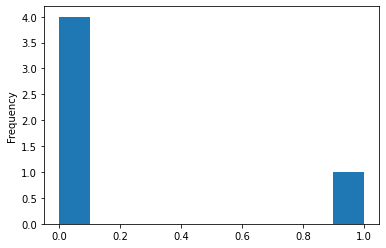

************************************************************
1    4
0    1
Name: B1, dtype: int64


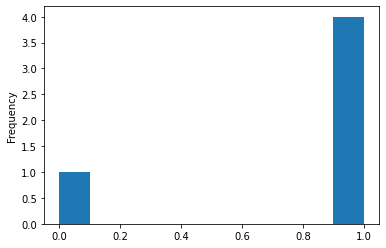

************************************************************
0    3
1    2
Name: B2, dtype: int64


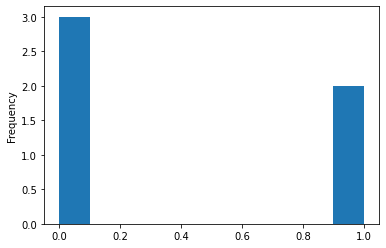

************************************************************
1    4
0    1
Name: B3, dtype: int64


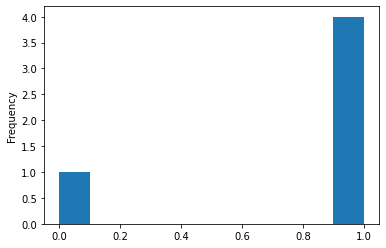

************************************************************
0    3
1    2
Name: B4, dtype: int64


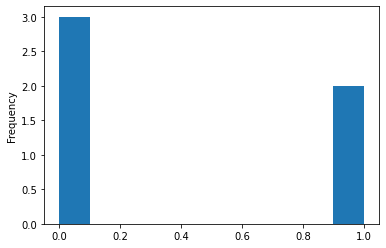

************************************************************
1    5
Name: C1, dtype: int64


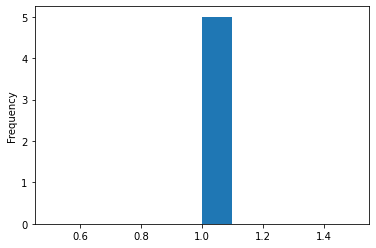

************************************************************
1    5
Name: D1, dtype: int64


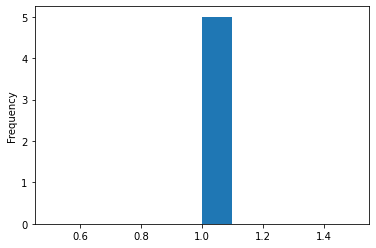

************************************************************
1    4
0    1
Name: D2, dtype: int64


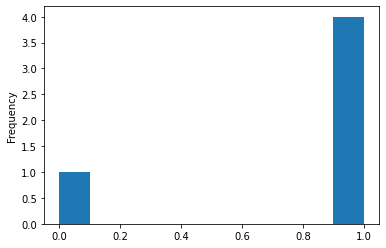

************************************************************


In [ ]:
cname = ['A1','A2','A3','A4','B1','B2','B3','B4','C1','D1','D2']
for x in cname:
  g = s[x]
  a = g.value_counts()
  print(a)
  #ax = g.plot.hist(bins=12, alpha=0.5)
  g.plot.hist()
  pyplot.show()
  print('************************************************************')


In [ ]:
cname = ['A1','A2','A3','A4','B1','B2','B3','B4','C1','D1','D2']
for x in cname:
  g = s1[x]
  a = g.value_counts()
  print(a)

0    1
Name: A1, dtype: int64
1    1
Name: A2, dtype: int64
0    1
Name: A3, dtype: int64
0    1
Name: A4, dtype: int64
0    1
Name: B1, dtype: int64
0    1
Name: B2, dtype: int64
0    1
Name: B3, dtype: int64
0    1
Name: B4, dtype: int64
0    1
Name: C1, dtype: int64
0    1
Name: D1, dtype: int64
0    1
Name: D2, dtype: int64


In [ ]:
cname = ['A1','A2','A3','A4','B1','B2','B3','B4','C1','D1','D2']
for x in cname:
  g = s2[x]
  a = g.value_counts()
  print(a)

0    189
Name: A1, dtype: int64
0    189
Name: A2, dtype: int64
0    189
Name: A3, dtype: int64
0    189
Name: A4, dtype: int64
0    189
Name: B1, dtype: int64
0    189
Name: B2, dtype: int64
0    189
Name: B3, dtype: int64
0    189
Name: B4, dtype: int64
0    189
Name: C1, dtype: int64
0    189
Name: D1, dtype: int64
0    189
Name: D2, dtype: int64


#### 3.5 Complete Example

### 4. Data Visualization
我們將看兩種類型的圖：

單變量圖以更好地理解每個屬性。
多變量圖以更好地理解屬性之間的關係。
#### 4.1 Univariate Plots
單變量圖:即每個單獨變量的圖

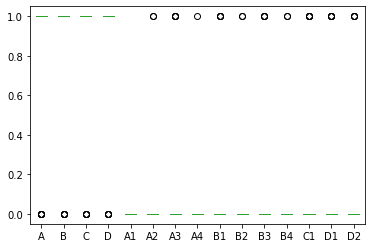

In [ ]:
# box and whisker plots
#dataset.plot(figsize=(20, 10))
dataset.plot(kind='box', subplots=False, sharex=False, sharey=False)
pyplot.show()

#### 每個輸入變量的直方圖以了解分佈情況

鳶尾花數據集每個輸入變量的直方圖

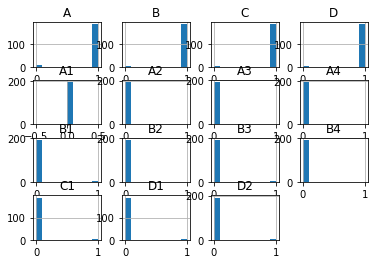

In [ ]:
# histograms 
dataset.hist()
pyplot.show()

#### 4.2 Multivariate Plots
變量之間的相互作用
所有屬性對的散點圖。這有助於發現輸入變量之間的結構化關係

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


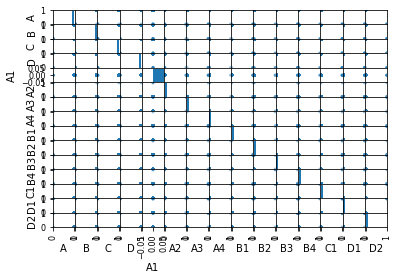

In [ ]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

### 5. Evaluate Some Algorithms
* 分離出一個驗證數據集。
* 設置測試工具以使用 10 折交叉驗證。
* 建立多個不同的模型，從花卉測量中預測物種
* 選擇最佳模型。
#### 5.1 Create a Validation Dataset
* 80% 將用於訓練、評估和在模型中選擇，20% 將作為驗證數據集保留

In [ ]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

#### 5.2 Test Harness
* 使用分層 10 折交叉驗證來估計模型準確性

#### 5.3 Build Models
* 測試 6 種不同的算法：

    * 邏輯回歸 (LR)
    * 線性判別分析 (LDA)
    * K-最近鄰（KNN）。
    * 分類和回歸樹 (CART)。
    * 高斯樸素貝葉斯 (NB)。
    * 支持向量機 (SVM)。
* 這是簡單線性（LR 和 LDA）、非線性（KNN、CART、NB 和 SVM）算法的良好混合。

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.933333 (0.050000)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


#### 5.4 Select Best Model
* 支持向量機 (SVM) 的估計準確度得分最高，約為 0.98 或 98%
* 我們還可以創建模型評估結果圖，並比較每個模型的傳播和平均準確度。每個算法都有一組準確度度量，因為每個算法都被評估了 10 次（通過 10 倍交叉驗證）。

#### 比較每個算法的結果樣本的一種有用方法是為每個分佈創建一個箱線圖並比較這些分佈。

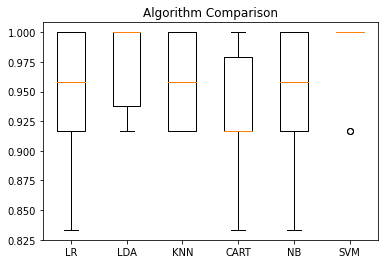

In [ ]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.038188)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


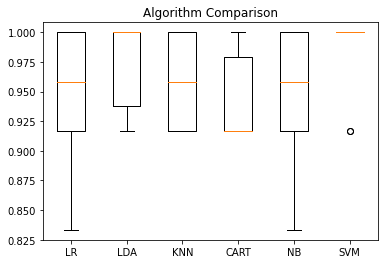

In [ ]:
# compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



#### 5.5 Complete Example

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.040825)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


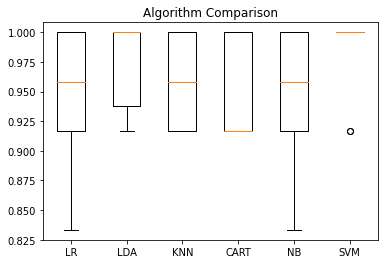

In [ ]:
# compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

### 6. Make Predictions
#### 6.1 Make Predictions
想了解模型在驗證集上的準確性
在整個訓練數據集上擬合模型並對驗證數據集進行預測

In [ ]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

#### 6.2 Evaluate Predictions

In [ ]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



在保留數據集上的準確率為 0.966 或約 96%。

混淆矩陣提供了所犯錯誤的指示。

### 6.3 Complete Example

In [ ]:
# make predictions
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

